# The Music of the Sphere: Probabilistic Graphical Models

This notebook contains a few different PGMs related to the Music project.

## Potential Mapping

In the simplest possible analysis, we have a set of "measured" Spherical Harmonic amplitudes $a_{lm}$, and wish to infer the amplitudes $f_n$ of a truncated Fourier series representation of the gravitational potential on large scales. 

We seek the posterior PDF for $f_n$ given the data, and an assumed prior defined by a power spectrum, which has normalisation $\alpha$ and dictates a covariance matrix $S$. Dropping unnecessary dependencies, we have:

${\rm Pr}(f_n|a_{lm},\alpha,S,H_0) \propto {\rm Pr}(a_{lm}|f_n,H_0) \; {\rm Pr}(f_n|\alpha,S,H_0)$

The PGM for this inference is below. Note that $\alpha$ and $S$ are assumed known, and $H_0$ is shorthand for all the (other) assumptions we are making (such as how many Fourier terms to include, how many $a_{lm}$'s to use, Gaussianity etc).

In [2]:
# !pip install --upgrade daft
import daft

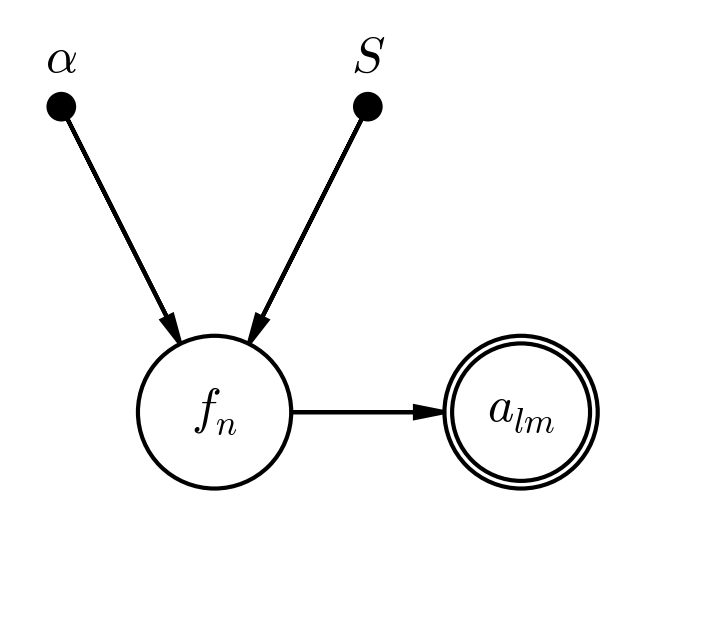

In [4]:
# Instantiate a PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("S", r"$S$", 1.5, 2, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("potential", r"$f_n$", 1, 1))

# Data:
pgm.add_node(daft.Node("alms", r"$a_{lm}$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "potential")
pgm.add_edge("S", "potential")
pgm.add_edge("potential", "alms")

# Render and save.
pgm.render()
pgm.figure.savefig("simple-map.png", dpi=300)

# Display:
from IPython.display import Image
Image(filename="simple-map.png")

## Slow-roll Inflation Parameter Inference

Now, let's extend this model to infer the slow-roll inflation parameters $\eta$. These completely define a power spectrum (including its normalisation), and are to be inferred from the data, via the potential map (which we marginalize over). Priors for $\eta$ must be defined, after which we have:

${\rm Pr}(\eta|a_{lm},H_1) \propto {\rm Pr}(\eta|H_1) \; \int \; {\rm Pr}(a_{lm}|f_n,H_1) \; {\rm Pr}(f_n|\eta,H_1) \; df_n$

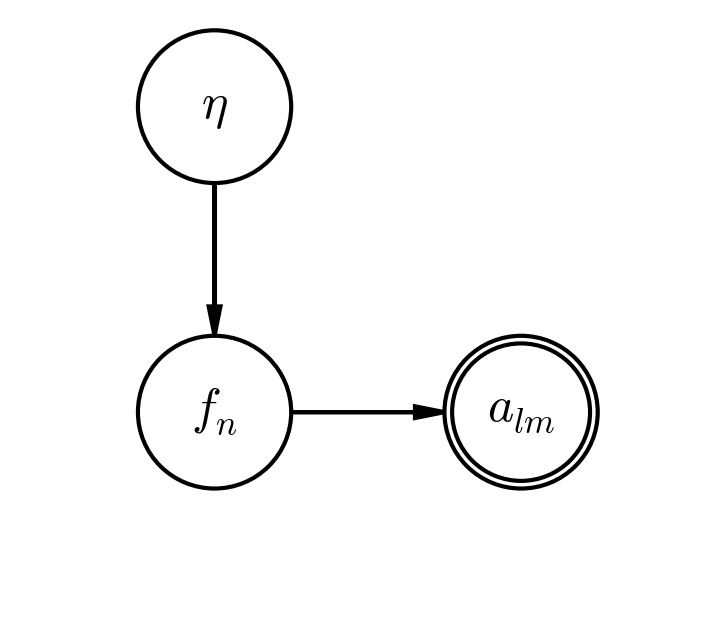

In [5]:
# Instantiate a PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

# Hierarchical parameters.
pgm.add_node(daft.Node("eta", r"$\eta$", 1, 2))

# Latent variable:
pgm.add_node(daft.Node("potential", r"$f_n$", 1, 1))

# Data:
pgm.add_node(daft.Node("alms", r"$a_{lm}$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("eta", "potential")
pgm.add_edge("potential", "alms")

# Render and save.
pgm.render()
pgm.figure.savefig("inflation.png", dpi=300)

# Display:
from IPython.display import Image
Image(filename="inflation.png")